In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [55]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2025, 3, 26)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [56]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.545433,35.424702,26.900126,29.051490,855215656
2007-10-08,30.879337,33.645375,30.685229,33.645375,126671715
2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
2007-10-10,33.289490,33.968868,32.998329,33.839461,67931378
2007-10-11,37.009911,38.821585,32.998349,38.821585,106320954


In [57]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-03-19,277.200012,278.299988,269.799988,272.0,13089950
2025-03-20,280.350006,283.549988,277.049988,283.5,13710249
2025-03-21,283.100006,285.149994,280.049988,281.0,26003527
2025-03-24,291.850006,293.950012,284.450012,285.0,19966817
2025-03-25,291.000000,295.250000,287.649994,291.0,16983852


In [58]:
df.shape

(4307, 5)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4307 entries, 2007-10-05 to 2025-03-25
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4307 non-null   float64
 1   (High, POWERGRID.NS)    4307 non-null   float64
 2   (Low, POWERGRID.NS)     4307 non-null   float64
 3   (Open, POWERGRID.NS)    4307 non-null   float64
 4   (Volume, POWERGRID.NS)  4307 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 201.9 KB


In [60]:
df.isnull().sum()

,,0
Price,Ticker,
Close,POWERGRID.NS,0
High,POWERGRID.NS,0
Low,POWERGRID.NS,0
Open,POWERGRID.NS,0
Volume,POWERGRID.NS,0


In [61]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4307.000000,4307.000000,4307.000000,4307.000000,4.307000e+03
mean,84.441052,85.539893,83.356995,84.482062,1.192228e+07
std,70.756504,71.603262,69.873893,70.752540,2.040538e+07
min,19.001736,20.312200,17.036039,20.213915,0.000000e+00
25%,36.667160,37.225077,36.155202,36.742823,4.867140e+06
50%,61.115181,62.088831,60.178974,61.152636,8.479053e+06
75%,85.106976,85.937066,84.105692,85.237064,1.373374e+07
max,356.113861,356.893408,348.074624,354.749603,8.552157e+08


In [62]:
df = df.reset_index()

In [63]:
df.shape

(4307, 6)

In [64]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.545433,35.424702,26.900126,29.051490,855215656
1,2007-10-08,30.879337,33.645375,30.685229,33.645375,126671715
2,2007-10-09,32.982170,33.273331,29.229417,30.895509,116725709
3,2007-10-10,33.289490,33.968868,32.998329,33.839461,67931378
4,2007-10-11,37.009911,38.821585,32.998349,38.821585,106320954


In [65]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [66]:
df.to_csv("powergrid.csv")

In [67]:
data01 = pd.read_csv("powergrid.csv")

In [68]:
data01.head()

,Price,Date,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05,32.545433044433594,35.4247016342326,26.900126354297335,29.05149029632149,855215656
2,1,2007-10-08,30.879337310791016,33.64537507515086,30.68522855070953,33.64537507515086,126671715
3,2,2007-10-09,32.98217010498047,33.27333102819074,29.229417128249786,30.895508777439975,116725709
4,3,2007-10-10,33.28948974609375,33.968867804246706,32.998328974863945,33.839461310618134,67931378


In [69]:
# Candlesticks
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'],
                                     high = data01['High'],
                                     low = data01['Low'],
                                     close = data01['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [70]:
df = df.drop(['Date'], axis = 1)

<ipython-input-70-0cad584de5c9>:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [71]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,32.545433,35.424702,26.900126,29.051490,855215656
1,30.879337,33.645375,30.685229,33.645375,126671715
2,32.982170,33.273331,29.229417,30.895509,116725709
3,33.289490,33.968868,32.998329,33.839461,67931378
4,37.009911,38.821585,32.998349,38.821585,106320954


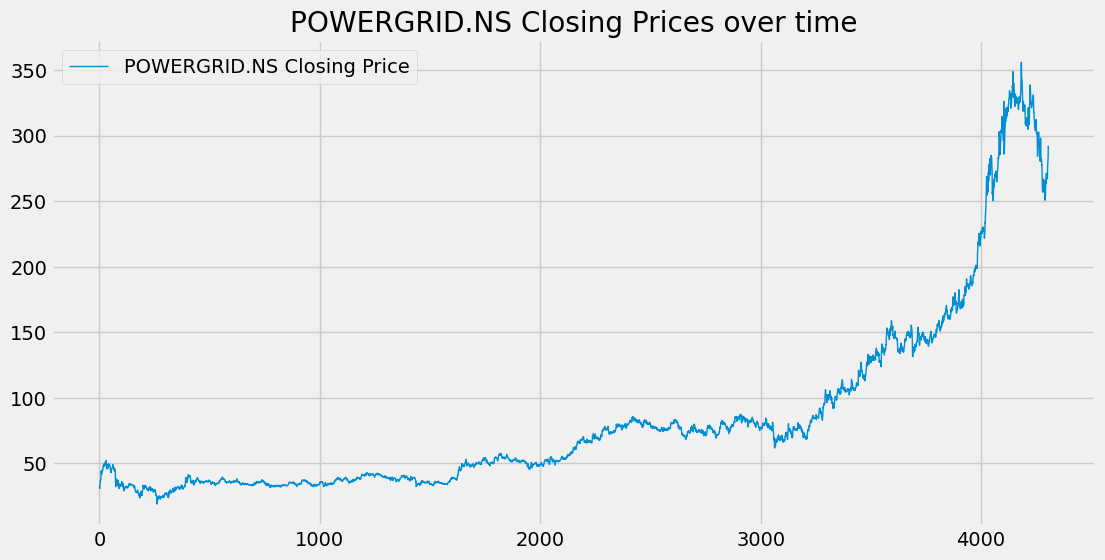

In [72]:
plt.figure(figsize = (12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)

plt.title(f'{stock} Closing Prices over time')

plt.legend()
plt.show()

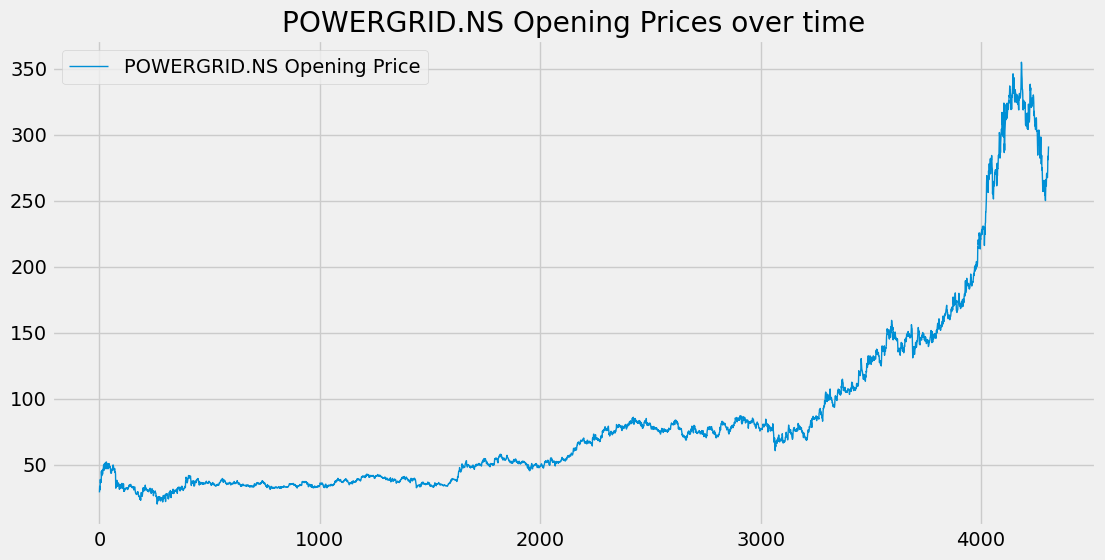

In [73]:
plt.figure(figsize = (12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)

plt.title(f'{stock} Opening Prices over time')

plt.legend()
plt.show()

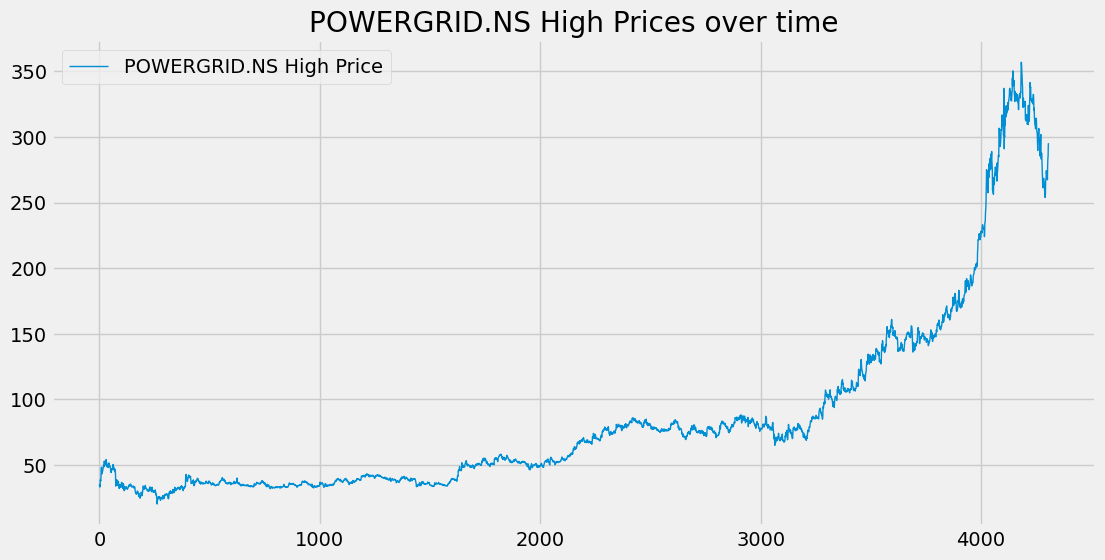

In [74]:
plt.figure(figsize = (12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)

plt.title(f'{stock} High Prices over time')

plt.legend()
plt.show()

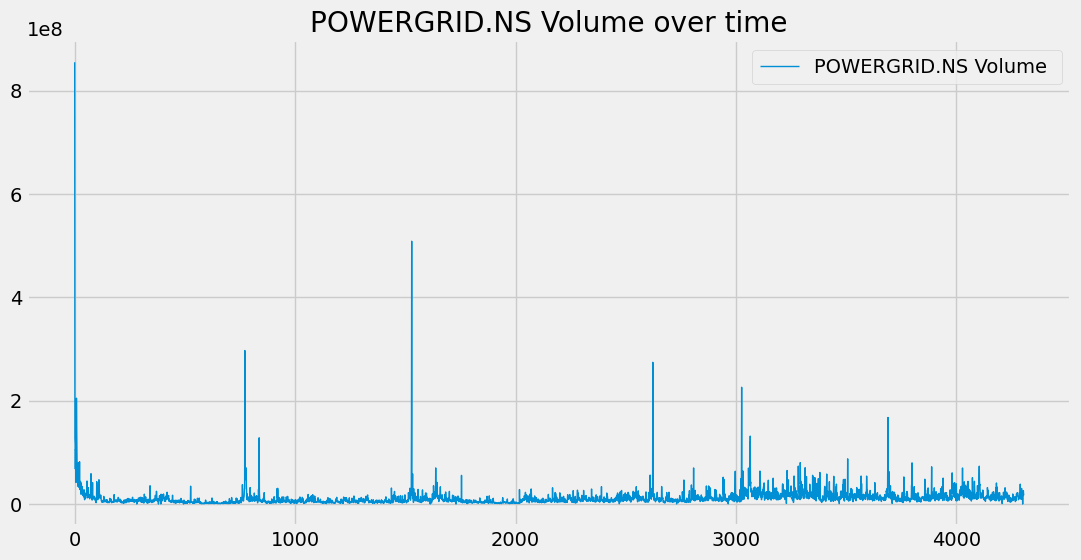

In [75]:
plt.figure(figsize = (12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume ', linewidth = 1)

plt.title(f'{stock} Volume over time')

plt.legend()
plt.show()

In [76]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# Moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [77]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [78]:
df01

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90


In [79]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [80]:
ma100 = df['Close'].rolling(100).mean()

In [81]:
ma100

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4302,296.277169
4303,296.003346
4304,295.732663
4305,295.527554


In [82]:
ma200 = df['Close'].rolling(200).mean()

In [83]:
ma200

Ticker,POWERGRID.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4302,310.728260
4303,310.498455
4304,310.483898
4305,310.499321


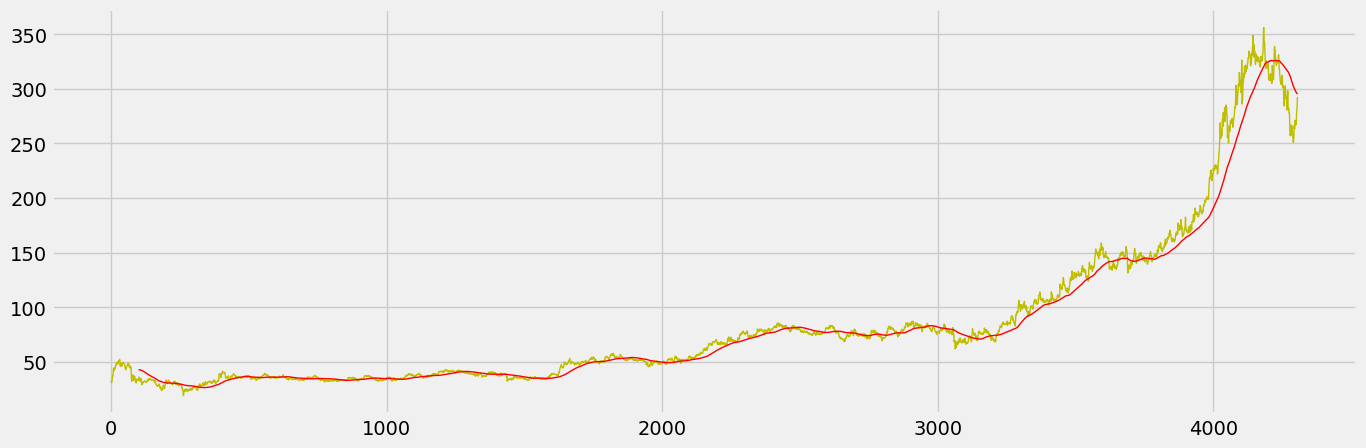

In [84]:
plt.figure(figsize = (15,5))
plt.plot(df.Close,'y', linewidth = 1)
plt.plot(ma100, 'r', linewidth = 1)

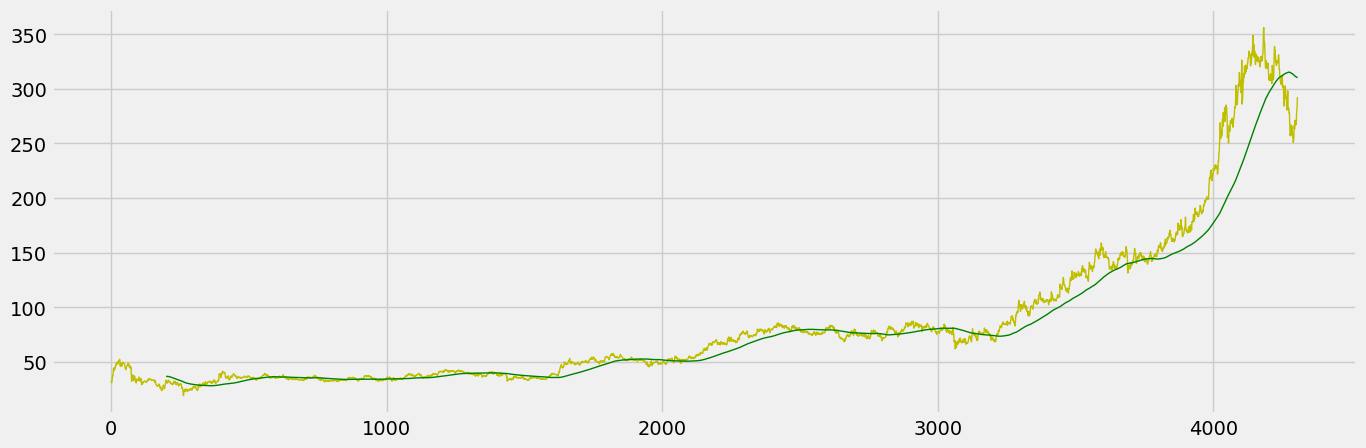

In [85]:
plt.figure(figsize = (15,5))
plt.plot(df.Close,'y', linewidth = 1)
plt.plot(ma200, 'g', linewidth = 1)

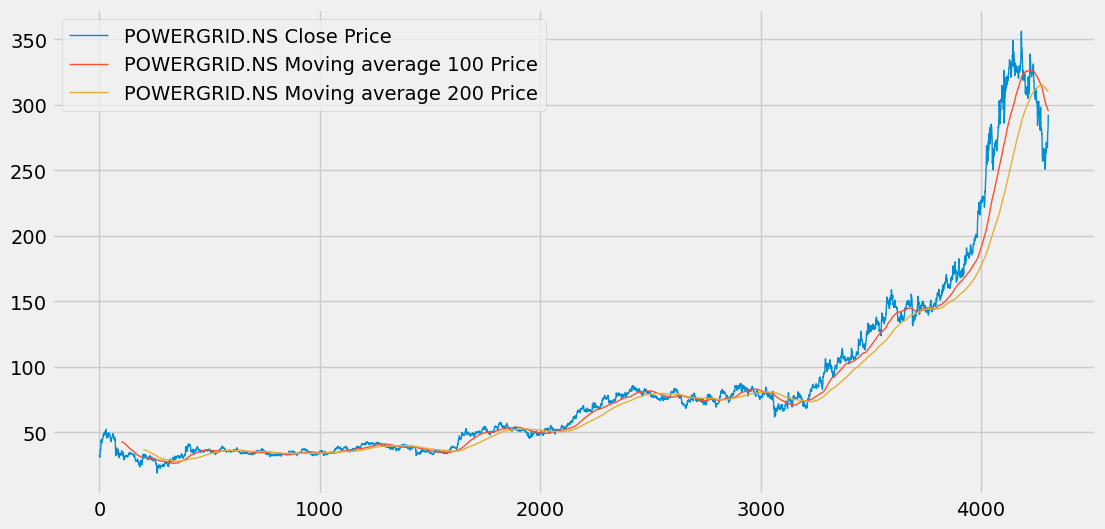

In [86]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving average 200 Price', linewidth = 1)

plt.legend()
plt.show()

In [87]:
ema100 = df.Close.ewm(span = 100,adjust = False).mean()

In [88]:
ema200 = df.Close.ewm(span = 200,adjust = False).mean()

In [89]:
df.pct_change

<bound method NDFrame.pct_change of Price         Close         High          Low         Open       Volume
Ticker POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
0         32.545433    35.424702    26.900126    29.051490    855215656
1         30.879337    33.645375    30.685229    33.645375    126671715
2         32.982170    33.273331    29.229417    30.895509    116725709
3         33.289490    33.968868    32.998329    33.839461     67931378
4         37.009911    38.821585    32.998349    38.821585    106320954
...             ...          ...          ...          ...          ...
4302     277.200012   278.299988   269.799988   272.000000     13089950
4303     280.350006   283.549988   277.049988   283.500000     13710249
4304     283.100006   285.149994   280.049988   281.000000     26003527
4305     291.850006   293.950012   284.450012   285.000000     19966817
4306     291.000000   295.250000   287.649994   291.000000     16983852

[4307 rows x 5 columns]>

In [90]:
df.pct_change(periods=1, fill_method='pad', limit=None, freq=None)

<ipython-input-90-de835a8dde7e>:1: FutureWarning:

The 'fill_method' keyword being not None and the 'limit' keyword in DataFrame.pct_change are deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,NaN,NaN,NaN,NaN,NaN
1,-0.051193,-0.050228,1.407095e-01,0.158129,-0.851883
2,0.068098,-0.011058,-4.744340e-02,-0.081731,-0.078518
3,0.009318,0.020904,1.289424e-01,0.095287,-0.418026
4,0.111760,0.142858,5.942043e-07,0.147228,0.565123
...,...,...,...,...,...
4302,0.036843,0.040957,9.163949e-03,0.017393,inf
4303,0.011364,0.018865,2.687176e-02,0.042279,0.047387
4304,0.009809,0.005643,1.082837e-02,-0.008818,0.896649


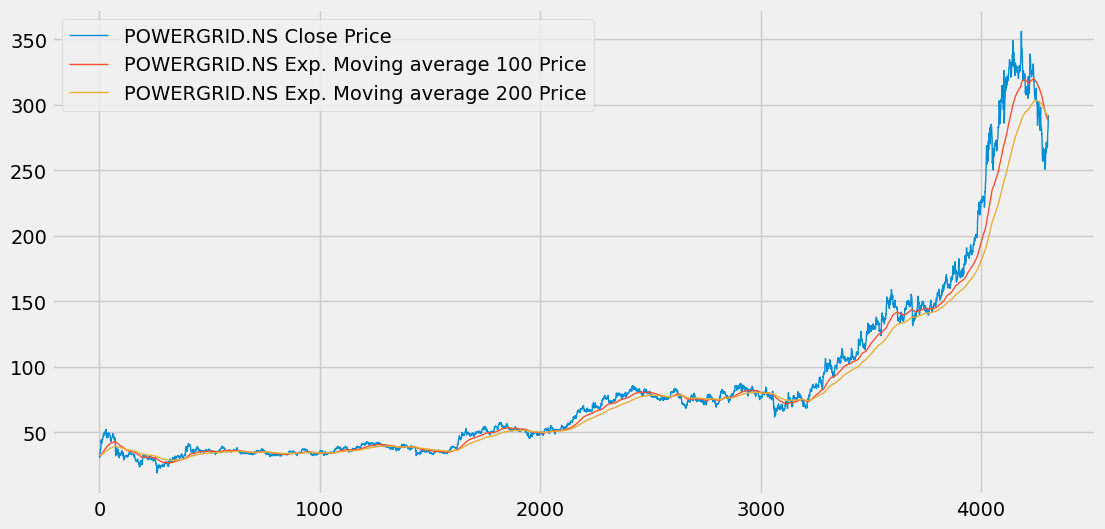

In [91]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving average 200 Price', linewidth = 1)

plt.legend()
plt.show()

LSTM OVER RNN. WHY?

lstm means long short term memory that means it can store the data in the its memory cell and higher RNN can do the same but it has very low memory issue do it can be overflowed and in lstm u can save the data in memory cell

In [92]:
# Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [93]:
data_training.shape

(3014, 1)

In [94]:
data_testing.shape

(1293, 1)

In [95]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range = (0, 1))

In [96]:
data_training_array = scalar.fit_transform(data_training)

In [97]:
data_training_array.shape

(3014, 1)

In [98]:
data_training_array

array([[0.19808613],
       [0.17371831],
       [0.20447372],
       ...,
       [0.90109661],
       [0.88840613],
       [0.8890107 ]])

In [99]:
x_train = []
y_train = []

for i in range (100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [100]:
x_train.shape

(2914, 100, 1)

In [101]:
# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)

LSTM 2D or RD

2D -> (batch_size units)

3D -> (batch_size, time_steps, units)

In [102]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [103]:
model = Sequential()

# Adding the Input Layer
model.add(Input(shape = (x_train.shape[1], 1)))

# Adding LSTM Layers with Dropout
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

# Adding the Output Layer
model.add(Dense(units = 1))

In [104]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Compiling the Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 282ms/step - loss: 0.1058
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - loss: 0.0087
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 270ms/step - loss: 0.0081
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 272ms/step - loss: 0.0068
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 264ms/step - loss: 0.0066
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 265ms/step - loss: 0.0063
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - loss: 0.0059
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - loss: 0.0053
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 259ms/step - loss: 0.0047
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - loss: 0.0056
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - loss: 0.0051
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 260ms/step - loss: 0.0044
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 42s 268ms/step - loss: 0.0045
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 268ms/step - loss: 0.0043
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [106]:
past_100_days = data_training.tail(100)

In [107]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [108]:
final_df.head()

Ticker,POWERGRID.NS
0,81.188866
1,82.760796
2,82.474998
3,82.474998
4,83.761101


In [109]:
input_data = scalar.fit_transform(final_df)

In [110]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [111]:
x_test.shape

(1293, 100, 1)

In [112]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step


In [113]:
y_predicted.shape

(1293, 1)

In [114]:
scalar.scale_

array([0.00339719])

In [115]:
scalar_factor = 1 / 0.00339719
y_predicted = y_predicted * scalar_factor
y_test = y_test * scalar_factor

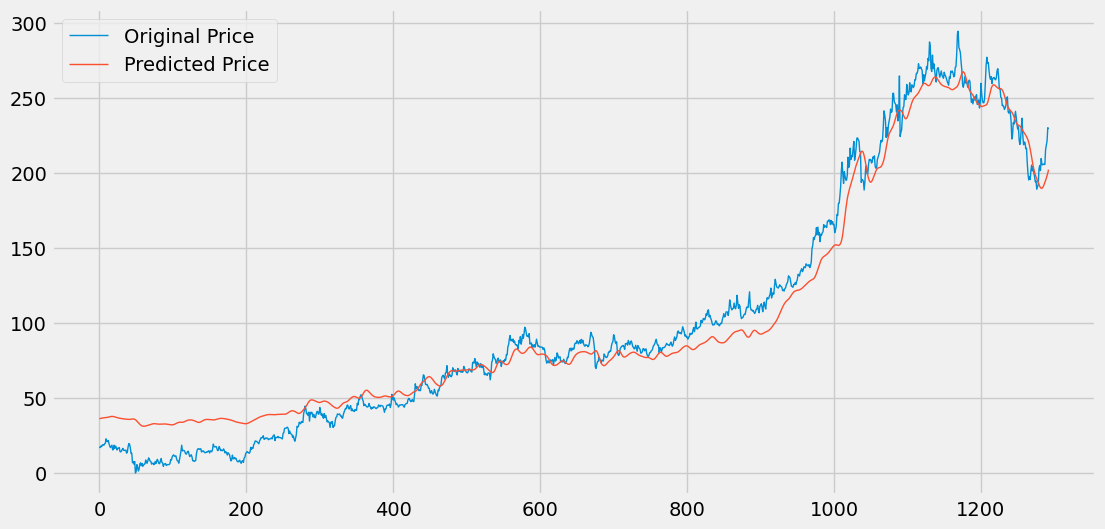

In [116]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)

plt.legend()
plt.show()

In [117]:
model.save('stock_dl_model.h5')